In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Poglejmo si, kako se je spreminjal delež pozitivnih testov.

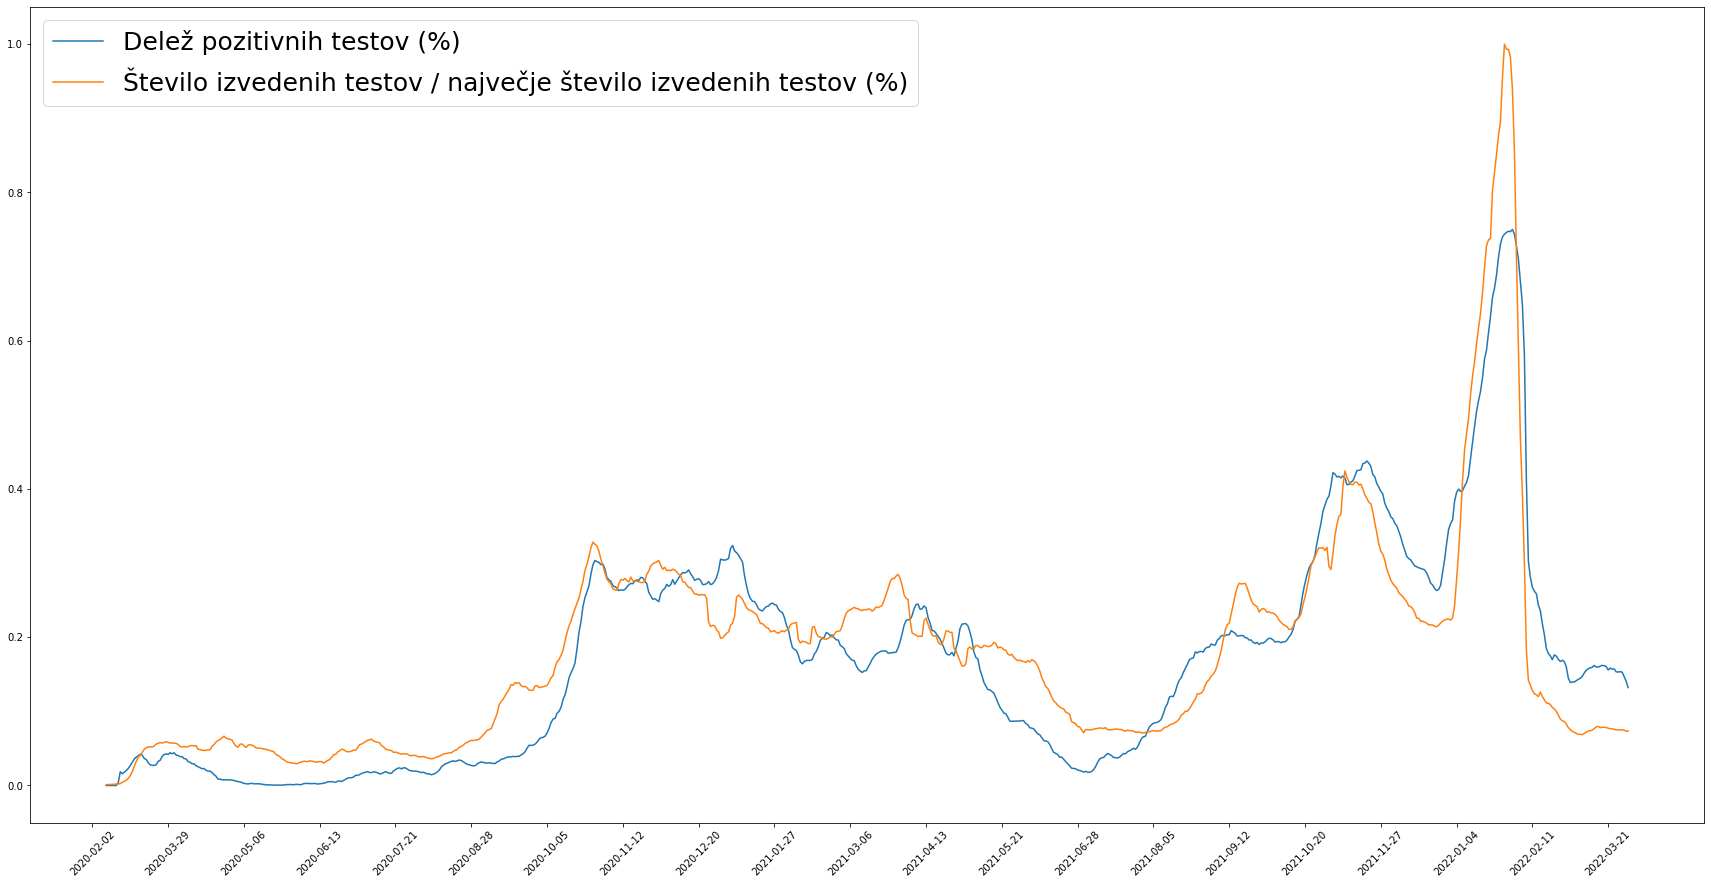

In [3]:
test_no_df = pd.read_csv("csv/lab-tests.csv")
test_no_df = test_no_df.fillna(0)
test_no_df["test.relative.positive"] = test_no_df["tests.positive.todate"].diff(7).div(test_no_df["tests.performed.todate"].diff(7))
test_no_df["test.performed.7days"] = test_no_df["tests.performed.todate"].diff(7)

plt.figure(figsize=(30,15))
plt.plot(test_no_df["date"], test_no_df["test.relative.positive"], label="Delež pozitivnih testov (%)")
plt.plot(test_no_df["date"], test_no_df["test.performed.7days"].div(test_no_df["test.performed.7days"].max()), label = "Število izvedenih testov / največje število izvedenih testov (%)")
plt.legend(loc="upper left", prop={'size': 25})
plt.xticks(range(0, len(test_no_df["date"]), len(test_no_df["date"])//20), rotation=45)
plt.show()



Vidimo, da je delež pozitivnih zelo povezan s številom izvedenih testov. Sprva je bil majhen delež testiranih ljudi pozitivnih in malo ljudi se je testiralo. Prvi porast v številu izvedenih testov vidimo septembra 2020 - sepravi ob začetku šolskega leta, ko so se dijaki morali testirati. Za tem mu je delež okužb hitro sledil. Število okuženih pa je ob koncu šolskega leta 2020/21 padel, in s poletjem se je tudi vedno manj ljudi testiralo. Jeseni leta 2021 pa vidimo, da je delež okuženih zelo narastel, in mu je število testiranj zato sledilo. Sklepam, da je to zato, ker se je ob večjem deležu pozitivnih več ljudi odločilo za testiranje, verjetno pa so pomagali tudi ukrepi vlade. Vidimo pa, da je bilo šolsko leto 2021/22 drugačno od prejšnjega. Predvsem je zelo viden skok pozitivnih (kateremu je sledil tudi skok v številu testiranj) takoj po novem letu v leto 2022. Sklepam, da so se  

In [4]:
print(test_no_df[test_no_df["test.performed.7days"] == test_no_df["test.performed.7days"].max()]["date"])
print(test_no_df[test_no_df["test.relative.positive"] == test_no_df["test.relative.positive"].max()]["date"])


708    2022-01-28
Name: date, dtype: object
712    2022-02-01
Name: date, dtype: object


F0: začetek pandemije, v sloveniji je še ni
F1: prvi primer okužbe ->

F7: vlada prekliče epidemijo <-
F11: vlada spet razglasi epidemijo ->

F17: epidemija se izteka <-
F18: novi ukrepi in omejitve ->

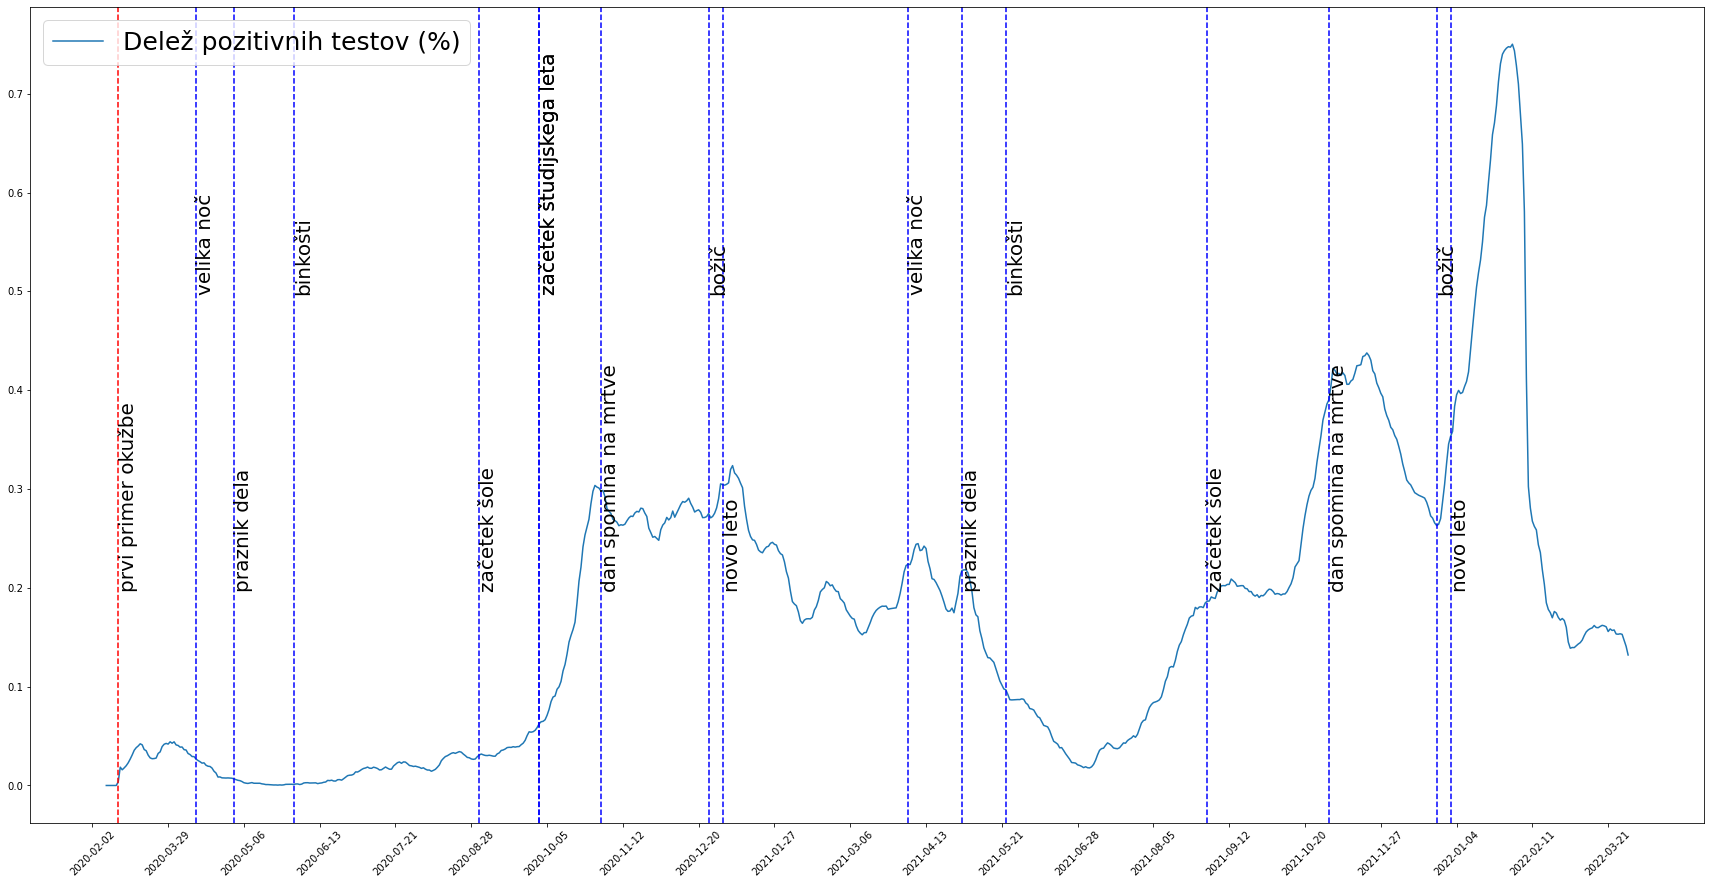

In [6]:
faze = pd.read_csv("csv/dict-phases.csv")
slabe_faze = [("F1", "prvi primer okužbe"), ("F11", "vlada spet razglasi epidemijo"), ("F18", "novi ukrepi in omejitve")]
dobre_faze = [("F7", "vlada prekliče epidemijo"), ("F17", "epidemija se izteka")]

slabe_faze = [("2020-03-04", "prvi primer okužbe"), ("2020-10-19", "vlada spet razglasi epidemijo"), ("2021-08-23", "novi ukrepi in omejitve")]
dobre_faze = [("2020-05-15", "vlada prekliče epidemijo"), ("2021-06-15", "epidemija se izteka")]

prazniki = [('2020-04-12', 'velika noč'),
            ('2020-05-01', 'praznik dela'),
            ('2020-05-31', 'binkošti'),
            ('2020-09-01', 'začetek šole'),
            ('2020-10-01', 'začetek študijskega leta'),
            ('2020-11-01', 'dan spomina na mrtve'),
            ('2020-12-25', 'božič'),
            ('2021-01-01', 'novo leto'),
            ('2021-04-04', 'velika noč'),
            ('2021-05-01', 'praznik dela'),
            ('2021-05-23', 'binkošti'),
            ('2021-09-01', 'začetek šole'),
            ('2021-10-01', 'začetek študijskega leta'),
            ('2021-11-01', 'dan spomina na mrtve'),
            ('2021-12-25', 'božič'),
            ('2022-01-01', 'novo leto')]


plt.figure(figsize=(30,15))
plt.plot(test_no_df["date"], test_no_df["test.relative.positive"], label="Delež pozitivnih testov (%)")
#plt.plot(test_no_df["date"], test_no_df["test.performed.7days"].div(test_no_df["test.performed.7days"].max()), label = "Število izvedenih testov / največje število izvedenih testov (%)")
plt.axvline(x = "2020-03-04", linestyle = "dashed", color="red")
plt.text("2020-03-04", 0.2, "prvi primer okužbe", rotation=90, size=20)
for i, df in enumerate(prazniki):
    plt.axvline(x = df[0], linestyle = "dashed", color="blue")
    plt.text(df[0], 0.5 if i%2 == 0 else 0.2, df[1], rotation=90, size=20)
# for df in dobre_faze:
#     plt.axvline(x = df[0], linestyle = "dashed", color="green")
# for df in slabe_faze:
#     plt.axvline(x = df[0], linestyle = "dashed", color="red")
plt.legend(loc="upper left", prop={'size': 25})
plt.xticks(range(0, len(test_no_df["date"]), len(test_no_df["date"])//20), rotation=45)
plt.show()






In [ ]:
for df in dobre_faze:
    print(faze[faze["id"] == df[0]]["date.from"])
for df in slabe_faze:
    print(faze[faze["id"] == df[0]]["date.from"])

test_no_df["date"]

Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)
Series([], Name: date.from, dtype: object)


0      2020-02-02
1      2020-02-09
2      2020-02-16
3      2020-02-23
4      2020-02-24
          ...    
766    2022-03-27
767    2022-03-28
768    2022-03-29
769    2022-03-30
770    2022-03-31
Name: date, Length: 771, dtype: object

In [ ]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
    
smrti = pd.read_csv("csv/daily_deaths_slovenia.csv")
print(smrti)
smrti["date"] = pd.to_datetime(smrti["date"], format='%Y-%m-%d')
#smrti = smrti.set_index('date')
#print(smrti)
#smrti_date = smrti["date"][smrti["date"].index % 10 == 1]
#smrti_dec = smrti["deceased"].groupby(np.arange(len(smrti))//10).mean()



smrti_reduced = smrti[(smrti['date'] > '2016-01-01') & (smrti['date'] < '2023-02-01')]
smrti_reduced.to_csv("smrti_reduced.csv")
letni_casi = ['03-21', '06-21', '09-23', '12-21']
df_list_pomlad = list()
df_list = list()

for i in range(3):
    l = list()
    for y in range(2015, 2023):
        dff = smrti_reduced[(smrti_reduced["date"] > datetime.datetime.strptime('{}-{}'.format(y, letni_casi[i]), '%Y-%m-%d')) & (smrti_reduced["date"] < datetime.datetime.strptime('{}-{}'.format(y, letni_casi[i+1]), '%Y-%m-%d'))]
        if(len(dff)>0):
            l.append(dff)
    df_list.append(l)

l = list()
for y in range(2015, 2023):
    dff = smrti_reduced[(smrti_reduced["date"] > datetime.datetime.strptime('{}-{}'.format(y, letni_casi[3]), '%Y-%m-%d')) & (smrti_reduced["date"] < datetime.datetime.strptime('{}-{}'.format(y+1, letni_casi[0]), '%Y-%m-%d'))]
    if(len(dff)>0):
        l.append(dff)
df_list.append(l)

# print(smrti_reduced)
plt.figure(figsize=(30,15))
colors = ['g', 'c', 'r', 'b']
for _col, _df in zip(colors, df_list):
    print(_col)
    print(_df[0])
    for d in _df:
        plt.plot(d["date"], d["deceased"], _col, label="Delež pozitivnih testov (%)")

for y in range(2016, 2023):
    plt.axvline(x = datetime.datetime.strptime('{}-01-01'.format(y), '%Y-%m-%d'), linestyle = "dashed", color="green")

plt.axvline(x = datetime.datetime.strptime('2020-03-05', '%Y-%m-%d'), linestyle = "dashed", color="red")

#plt.xticks(range(0, len(smrti_date), len(smrti_date)//20), rotation=45)
plt.show()

            date  deceased
0     2010-01-01        60
1     2010-01-02        45
2     2010-01-03        58
3     2010-01-04        66
4     2010-01-05        50
...          ...       ...
4443  2022-03-02        66
4444  2022-03-03        70
4445  2022-03-04        83
4446  2022-03-05        81
4447  2022-03-06        52

[4448 rows x 2 columns]
g
           date  deceased
2272 2016-03-22        57
2273 2016-03-23        58
2274 2016-03-24        52
2275 2016-03-25        57
2276 2016-03-26        64
...         ...       ...
2358 2016-06-16        53
2359 2016-06-17        58
2360 2016-06-18        54
2361 2016-06-19        40
2362 2016-06-20        49

[91 rows x 2 columns]
c
           date  deceased
2364 2016-06-22        49
2365 2016-06-23        55
2366 2016-06-24        42
2367 2016-06-25        60
2368 2016-06-26        58
...         ...       ...
2452 2016-09-18        61
2453 2016-09-19        44
2454 2016-09-20        43
2455 2016-09-21        58
2456 2016-09-22        50


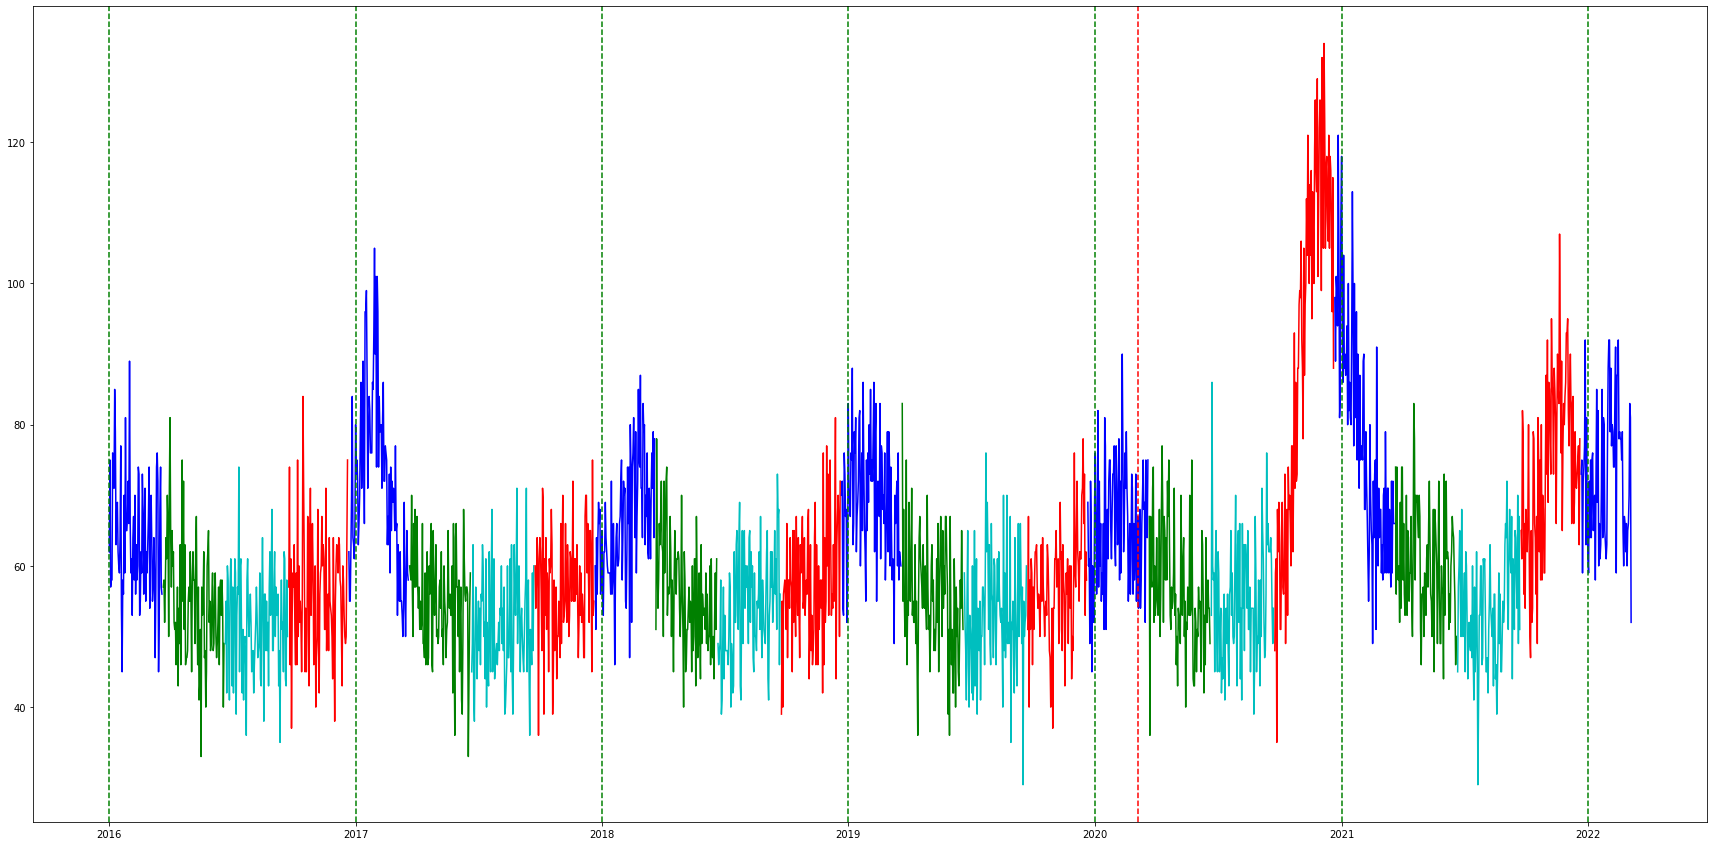

In [65]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
    
smrti = pd.read_csv("csv/daily_deaths_slovenia.csv")
print(smrti)
smrti["date"] = pd.to_datetime(smrti["date"], format='%Y-%m-%d')
#smrti = smrti.set_index('date')
#print(smrti)
#smrti_date = smrti["date"][smrti["date"].index % 10 == 1]
#smrti_dec = smrti["deceased"].groupby(np.arange(len(smrti))//10).mean()



smrti_reduced = smrti[(smrti['date'] > '2016-01-01') & (smrti['date'] < '2023-02-01')]
smrti_reduced.to_csv("smrti_reduced.csv")
letni_casi = ['03-21', '06-21', '09-23', '12-21']
df_list_pomlad = list()
df_list = list()

for i in range(3):
    l = list()
    for y in range(2015, 2023):
        dff = smrti_reduced[(smrti_reduced["date"] > datetime.datetime.strptime('{}-{}'.format(y, letni_casi[i]), '%Y-%m-%d')) & (smrti_reduced["date"] < datetime.datetime.strptime('{}-{}'.format(y, letni_casi[i+1]), '%Y-%m-%d'))]
        if(len(dff)>0):
            l.append(dff)
    df_list.append(l)

l = list()
for y in range(2015, 2023):
    dff = smrti_reduced[(smrti_reduced["date"] > datetime.datetime.strptime('{}-{}'.format(y, letni_casi[3]), '%Y-%m-%d')) & (smrti_reduced["date"] < datetime.datetime.strptime('{}-{}'.format(y+1, letni_casi[0]), '%Y-%m-%d'))]
    if(len(dff)>0):
        l.append(dff)
df_list.append(l)

# print(smrti_reduced)
plt.figure(figsize=(30,15))
colors = ['g', 'c', 'r', 'b']
for _col, _df in zip(colors, df_list):
    print(_col)
    print(_df[0])
    for d in _df:
        plt.plot(d["date"], d["deceased"], _col, label="Delež pozitivnih testov (%)")

for y in range(2016, 2023):
    plt.axvline(x = datetime.datetime.strptime('{}-01-01'.format(y), '%Y-%m-%d'), linestyle = "dashed", color="green")

plt.axvline(x = datetime.datetime.strptime('2020-03-05', '%Y-%m-%d'), linestyle = "dashed", color="red")

#plt.xticks(range(0, len(smrti_date), len(smrti_date)//20), rotation=45)
plt.show()